In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.cluster import KMeans
from sklearn import datasets


np.random.seed(5)

# Input dataset. Set X as dataset and y as true label.
########################################################
# Input data 1: load iris data from scikit-learn dataset
#########################################################
"""
iris = datasets.load_iris()
X = iris.data
y = iris.target
"""

########################################################
# Input data 2: load data from csv
ds = pd.read_csv("../project/data/AQI Data Set.csv", index_col=0)
# pd.DataFrame.to_csv
X0 = np.array(ds)

X = X0[:,0:X0.shape[1]-1]
y = X0[:,X0.shape[1]-1]

y = np.reshape(y,(72,)).astype(int)

ValueError: cannot reshape array of size 72 into shape (70,)

In [4]:
X0.shape

(150, 5)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

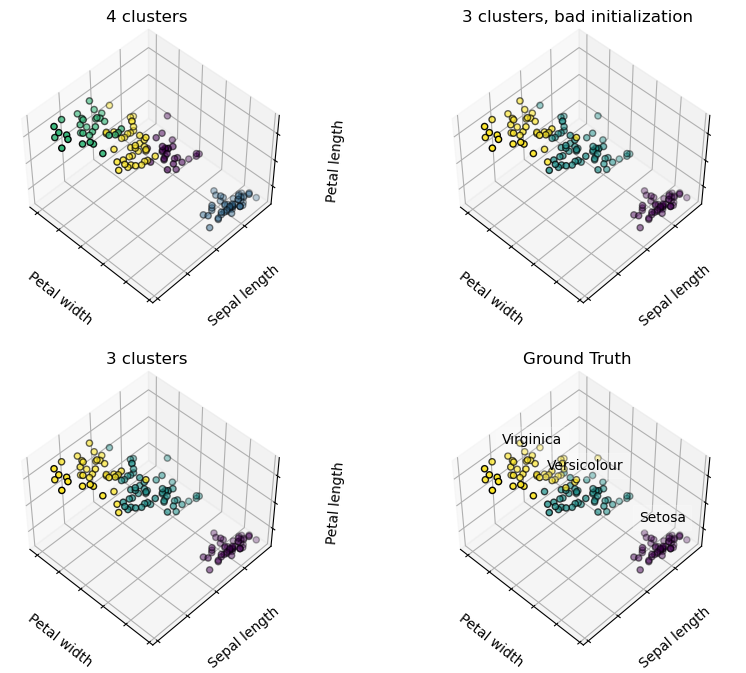

In [6]:


# Create 3 K-means classifier. The 1st K-means has 4 clusters. The 2nd
# K-means has 3 clusters. The 3rd K-means has 3 clusters and initializes the
# centroids badly.
estimators = [
    ("k_means_iris_4", KMeans(n_clusters=4, n_init="auto")),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
    ("k_means_iris_3", KMeans(n_clusters=3, n_init="auto")),

]

# Initialize the figure. Set figure size.
fig = plt.figure(figsize=(10, 8))

titles = ["4 clusters", "3 clusters, bad initialization", "3 clusters"]

for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    # Apply K-means to X dataset
    est.fit(X)
    # Get the clustering results from K-means
    labels = est.labels_

    # Draw points in each cluster. Their clusters are determined by their labels (which clusters they belong to)
    # Each point in X will be assigned to a cluster. The results are samed in labels
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(int), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)


# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    # Set the label's location and style
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [0, 2, 1])
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()


In [7]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)